In [2]:
import pandas as pd
# Simulating applying it to new data
data = pd.read_csv("final_dataset.csv")  

In [4]:
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,job,num_dependents,credit_job_ratio,credit_age_ratio,...,employment_4<=X<7,employment_<1,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_bank,housing_for free,housing_own,housing_rent,marital_status_div/dep/mar,class
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,9.592327e-17,4.156675e-16,1.065814e-17,-1.776357e-16,1.953993e-16,-1.492140e-16,5.684342e-17,-1.065814e-17,9.698908e-16,-4.209966e-16,...,0.174000,0.172000,0.154000,0.282000,0.13900,0.108000,0.713000,0.179000,0.310000,0.700000
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,...,0.379299,0.377569,0.361129,0.450198,0.34612,0.310536,0.452588,0.383544,0.462725,0.458487
min,-1.402415e+00,-2.918436e+00,-1.764514e+00,-1.672459e+00,-1.918610e+00,-7.049260e-01,-2.914492e+00,-4.282896e-01,-2.703813e+00,-2.869881e+00,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.386675e-01,-7.338481e-01,-8.701833e-01,-7.659773e-01,-7.634271e-01,-7.049260e-01,1.469492e-01,-4.282896e-01,-7.655209e-01,-7.010620e-01,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.408572e-01,-5.118791e-02,2.414692e-02,1.405047e-01,-9.684687e-02,-7.049260e-01,1.469492e-01,-4.282896e-01,-5.902786e-02,-5.010471e-02,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,2.569531e-01,6.421359e-01,9.184772e-01,1.046987e+00,7.094090e-01,1.027079e+00,1.469492e-01,-4.282896e-01,6.604698e-01,7.077011e-01,...,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000
max,4.239436e+00,2.619900e+00,9.184772e-01,1.046987e+00,2.664741e+00,4.491089e+00,1.677670e+00,2.334869e+00,3.788073e+00,2.879220e+00,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(mi_X_transformed_df, y, test_size=0.3, random_state=42, stratify=y)

import tqdm as notebook_tqdm
import xgboost as xgb  
from xgboost import XGBClassifier  
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import shap



import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

eval_clf = {}
def evaluating_clf_models(model, name, X_train, Y_train, X_test, Y_test):
    if name not in eval_clf.keys():
        eval_clf[name] = {
            "Accuracy Score": {"train data": 0, "test data": 0},
            "Precision Score": {"train data": 0, "test data": 0},
            "Recall Score": {"train data": 0, "test data": 0},
            "F1 Score": {"train data": 0, "test data": 0}
        }
    print("="*25, name, "="*25)

    # Get continuous predictions (probabilities)
    Y_train_pred_proba = model.predict(X_train)
    Y_test_pred_proba = model.predict(X_test)

    # Binary to list of continuous values
    train_pred = Y_train_pred_proba # list(map(float, Y_train_pred_proba.decode().split()))
    test_pred = Y_test_pred_proba # list(map(float, Y_test_pred_proba.decode().split()))

    # Convert probabilities to binary labels (threshold = 0.5)
    thresholded_train_list = [1 if num >= 0.5 else 0 for num in train_pred]
    thresholded_test_list = [1 if num >= 0.5 else 0 for num in test_pred]


    print("++++++++++",len(Y_train), len(thresholded_train_list))
    # Classification Report of Train and Test
    clf_report_train = classification_report(Y_train, thresholded_train_list, labels=None, target_names=None, sample_weight=None)
    clf_report_test = classification_report(Y_test, thresholded_test_list, labels=None, target_names=None, sample_weight=None)

    # Accuracy
    train_accuracy = accuracy_score(Y_train, thresholded_train_list)
    test_accuracy = accuracy_score(Y_test, thresholded_test_list)
    print("Accuracy is:\n \t\t trained data: ", train_accuracy, "\n \t\t test data: ", test_accuracy)
    eval_clf[name]["Accuracy Score"]["train data"] = train_accuracy
    eval_clf[name]["Accuracy Score"]["test data"] = test_accuracy
    print("-"*50)

    # Precision
    train_precision = precision_score(Y_train, thresholded_train_list, zero_division=1)
    test_precision = precision_score(Y_test, thresholded_test_list, zero_division=1)
    print("Precision is:\n \t\t trained data: ", train_precision, "\n \t\t test data: ", test_precision)
    eval_clf[name]["Precision Score"]["train data"] = train_precision
    eval_clf[name]["Precision Score"]["test data"] = test_precision
    print("-"*50)

    # Recall
    train_recall = recall_score(Y_train, thresholded_train_list)
    test_recall = recall_score(Y_test, thresholded_test_list)
    print("Recall is:\n \t\t trained data: ", train_recall, "\n \t\t test data: ", test_recall)
    eval_clf[name]["Recall Score"]["train data"] = train_recall
    eval_clf[name]["Recall Score"]["test data"] = test_recall
    print("-"*50)

    # F1 Score
    train_f1 = f1_score(Y_train, thresholded_train_list)
    test_f1 = f1_score(Y_test, thresholded_test_list)
    print("F1 score is:\n \t\t trained data: ", train_f1, "\n \t\t test data: ", test_f1)
    eval_clf[name]["F1 Score"]["train data"] = train_f1
    eval_clf[name]["F1 Score"]["test data"] = test_f1

    # Confusion Matrix
    confusion_matrix_ = confusion_matrix(Y_test, thresholded_test_list)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix_, annot=True, cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    cm_title = "Confusion Matrix for " + name
    plt.title(cm_title)
    plt.show()
    print("\n")

    # ROC Curve (uses probabilities, not binary labels)
    roc_name = "ROC Curve For " + name
    fpr, tpr, th = roc_curve(Y_test, test_pred)
    plt.plot(fpr, tpr)
    plt.title(roc_name)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    print("\n")

    return eval_clf, clf_report_train, clf_report_test

In [10]:
from datetime import datetime
import pytz

# While Saving model, adding timestamp as extention to distinguish
def add_extension():
    india_tz = pytz.timezone('Asia/Kolkata')
    current_time_ist = datetime.now(india_tz)

    current_time_ist = current_time_ist.strftime("%Y-%m-%d %H:%M:%S")

    current_time_ist = current_time_ist.replace(':', '_')
    current_time_ist = current_time_ist.replace('-', '_')
    current_time_ist = current_time_ist.replace(' ', '_')
    return current_time_ist

In [11]:
import tqdm as notebook_tqdm
import optuna
import xgboost as xgb
from sklearn.metrics import f1_score
import numpy as np
import plotly
import matplotlib.pyplot 
from optuna.visualization import plot_optimization_history, plot_intermediate_values


def tune_xgboost(X_train, y_train):
    """Tune hyperparameters using Optuna."""

    def objective(trial):
        num_classes = len(np.unique(y_train))  # Get the number of classes

        params = {
            # General Parameters
            'booster': 'dart',  
            'verbosity': 0,  
            'validate_parameters': True,
            'disable_default_eval_metric': False,

            # Parameters for the Tree Booster
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.07),  
            'min_split_loss': trial.suggest_float('min_split_loss', 0.0, 4.0),  
            'max_depth': trial.suggest_int('max_depth', 2, 7),  
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),  
            'max_delta_step': trial.suggest_int('max_delta_step', 1, 10),  
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),  
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),  
            'reg_lambda': trial.suggest_float('lambda', 0.5, 1.0),  
            'tree_method': 'hist',  
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),  
            'scale_pos_weight': len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  
            'max_leaves': trial.suggest_int('max_leaves', 0, 5),  
            'max_bin': trial.suggest_int('max_bin', 200, 300),  

            # Parameters of Dart Booster
            'sample_type': 'weighted',
            'normalize_type': 'forest',
            'rate_drop': trial.suggest_float('rate_drop', 0.0, 1.0),

            # Learning Task Parameters
            'objective': 'multi:softmax',
            'use_label_encoder': False,
            'eval_metric': 'mlogloss',  
            'num_class': num_classes  # Fix: Add num_class
        }

        model = xgb.XGBClassifier(**params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_train)
        return f1_score(y_train, y_pred, average='weighted')

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=20)

    # plot_optimization_history(study)
    # plot_intermediate_values(study)

    return study.best_params

In [21]:
import json


def split_and_train(X, y, flag, best_params):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

    # Tune hyperparameters using Optuna
    if flag:
        best_params = tune_xgboost(X_train, y_train)

    # Define XGBoost model with class weight
    model = xgb.XGBClassifier(**best_params)

    # Train model
    model.fit(X_train, y_train)


    eval_clf, clf_report_train, clf_report_test = evaluating_clf_models(model, f"XGBOOST", X_train, y_train, X_test, y_test)


    with open(f"results/Model_{add_extension()}.txt", "a") as file:
        file.write(f"\n\nResult with {len(X_train.columns)} features: {list(X_train.columns)}\n")

        file.write("=" * 25 + " Best Parameters " + "=" * 25 + "\n")
        json.dump(best_params, file, indent=4)  # Save in JSON format with indentation
        file.write("\n")

        file.write("=" * 25 + " Whole Classification Report " + "=" * 25 + "\n")
        json.dump(eval_clf, file, indent=4)  # Save in JSON format with indentation
        file.write("\n")

        file.write("=" * 25 + " Classification Report of Training " + "=" * 25 + "\n")
        file.write(clf_report_train + "\n")

        file.write("=" * 25 + " Classification Report of Testing " + "=" * 25 + "\n")
        file.write(clf_report_test + "\n")

        file.write("=" * 200 + "\n" + "="*200 + "\n\n")


    return model, X_train, best_params


def apply_shap(model, X_train):
    print("In shap", "="*20)
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_train)


    # Summary plot for feature importance
    shap.summary_plot(shap_values, X_train)


    # Get mean absolute SHAP values for each feature
    shap_importance = np.abs(shap_values.values).mean(axis=0)

    # Create DataFrame of feature importance
    feature_importance = pd.DataFrame({'Feature': X_train.columns, 'SHAP Importance': shap_importance})

    # # Sort features by importance
    feature_importance = feature_importance.sort_values(by='SHAP Importance', ascending=False)
    print(len(feature_importance))


    # Filter out features with non-zero SHAP importance
    non_zero_features = feature_importance[feature_importance['SHAP Importance'] > 0]
    print(len(non_zero_features))

    # Display the selected features
    return feature_importance['Feature'], non_zero_features

In [22]:
X = data.drop(columns=["class"])
y = data['class']

In [23]:
X.columns

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'job', 'num_dependents',
       'credit_job_ratio', 'credit_age_ratio', 'monthly_burden', 'debt_burden',
       'checking_status_0<=X<200', 'checking_status_<0',
       'checking_status_no checking', 'credit_history_all paid',
       'credit_history_critical/other existing credit',
       'credit_history_no credits/all paid', 'purpose_education',
       'purpose_new car', 'purpose_radio/tv', 'purpose_used car',
       'savings_status_500<=X<1000', 'savings_status_<100',
       'savings_status_>=1000', 'savings_status_no known savings',
       'employment_4<=X<7', 'employment_<1',
       'property_magnitude_no known property',
       'property_magnitude_real estate', 'other_payment_plans_bank',
       'housing_for free', 'housing_own', 'housing_rent',
       'marital_status_div/dep/mar'],
      dtype='object')

In [24]:
X.columns = X.columns.astype(str).str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X.columns

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'job', 'num_dependents',
       'credit_job_ratio', 'credit_age_ratio', 'monthly_burden', 'debt_burden',
       'checking_status_0__X_200', 'checking_status__0',
       'checking_status_no_checking', 'credit_history_all_paid',
       'credit_history_critical_other_existing_credit',
       'credit_history_no_credits_all_paid', 'purpose_education',
       'purpose_new_car', 'purpose_radio_tv', 'purpose_used_car',
       'savings_status_500__X_1000', 'savings_status__100',
       'savings_status___1000', 'savings_status_no_known_savings',
       'employment_4__X_7', 'employment__1',
       'property_magnitude_no_known_property',
       'property_magnitude_real_estate', 'other_payment_plans_bank',
       'housing_for_free', 'housing_own', 'housing_rent',
       'marital_status_div_dep_mar'],
      dtype='object')

#### Initial Train

[I 2025-07-17 12:59:20,488] A new study created in memory with name: no-name-ffad3c15-3e0e-43af-a62e-f2b8e6417bb2
[I 2025-07-17 12:59:42,024] Trial 0 finished with value: 0.729798276537407 and parameters: {'learning_rate': 0.05572941192630836, 'min_split_loss': 3.1836471620175772, 'max_depth': 5, 'min_child_weight': 3, 'max_delta_step': 7, 'subsample': 0.5839013114478936, 'colsample_bytree': 0.8139436597671774, 'lambda': 0.825001979566649, 'n_estimators': 382, 'max_leaves': 4, 'max_bin': 226, 'rate_drop': 0.9639017408379436}. Best is trial 0 with value: 0.729798276537407.
[I 2025-07-17 13:00:54,075] Trial 1 finished with value: 0.7811367127496159 and parameters: {'learning_rate': 0.02776502745359183, 'min_split_loss': 2.726214484055138, 'max_depth': 4, 'min_child_weight': 10, 'max_delta_step': 7, 'subsample': 0.9469772522422024, 'colsample_bytree': 0.5673539789805639, 'lambda': 0.8929323346862694, 'n_estimators': 496, 'max_leaves': 5, 'max_bin': 295, 'rate_drop': 0.17184760905408503}. 

========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8757142857142857 
 		 test data:  0.75
--------------------------------------------------
Precision is:
 		 trained data:  0.8656987295825771 
 		 test data:  0.7824267782426778
--------------------------------------------------
Recall is:
 		 trained data:  0.9734693877551021 
 		 test data:  0.8904761904761904
--------------------------------------------------
F1 score is:
 		 trained data:  0.9164265129682997 
 		 test data:  0.8329621380846325


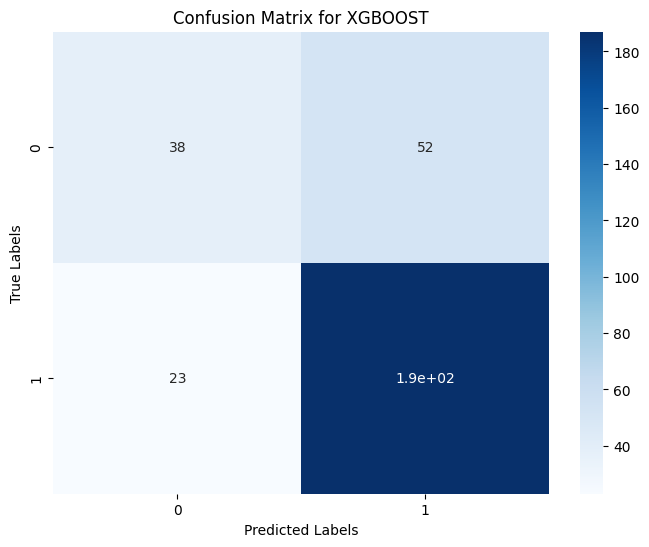

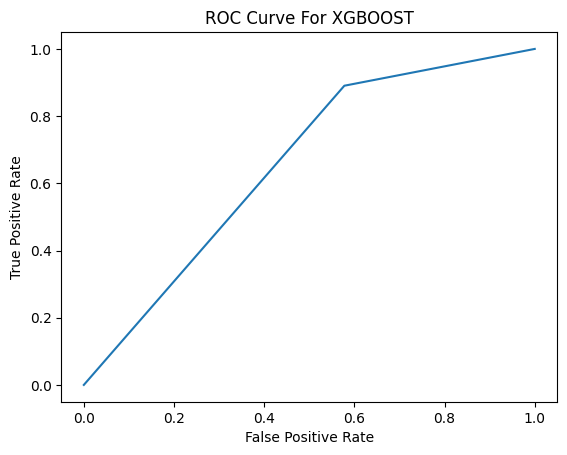



In shap ====================


 93%|=================== | 650/700 [00:16<00:01]       

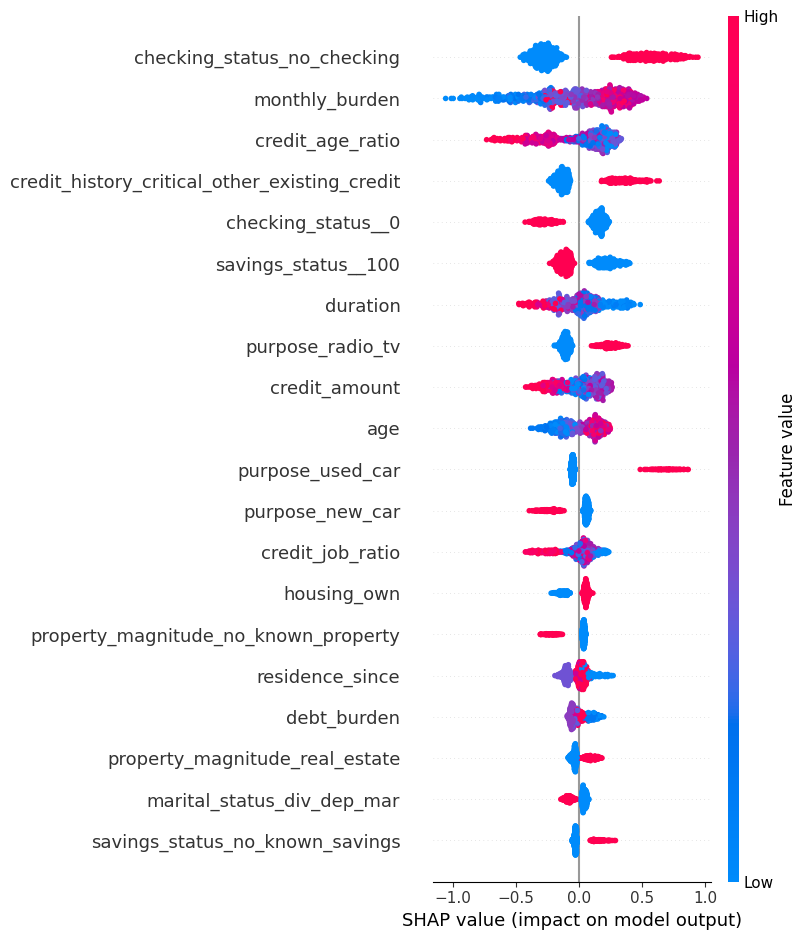

35
32


In [ ]:
flag = 1
best_params = 0 

model, X_train, best_params = split_and_train(X, y, flag, best_params)
if flag == 1:

    imp_features = apply_shap(model, X_train)
    flag =0

In shap ====================


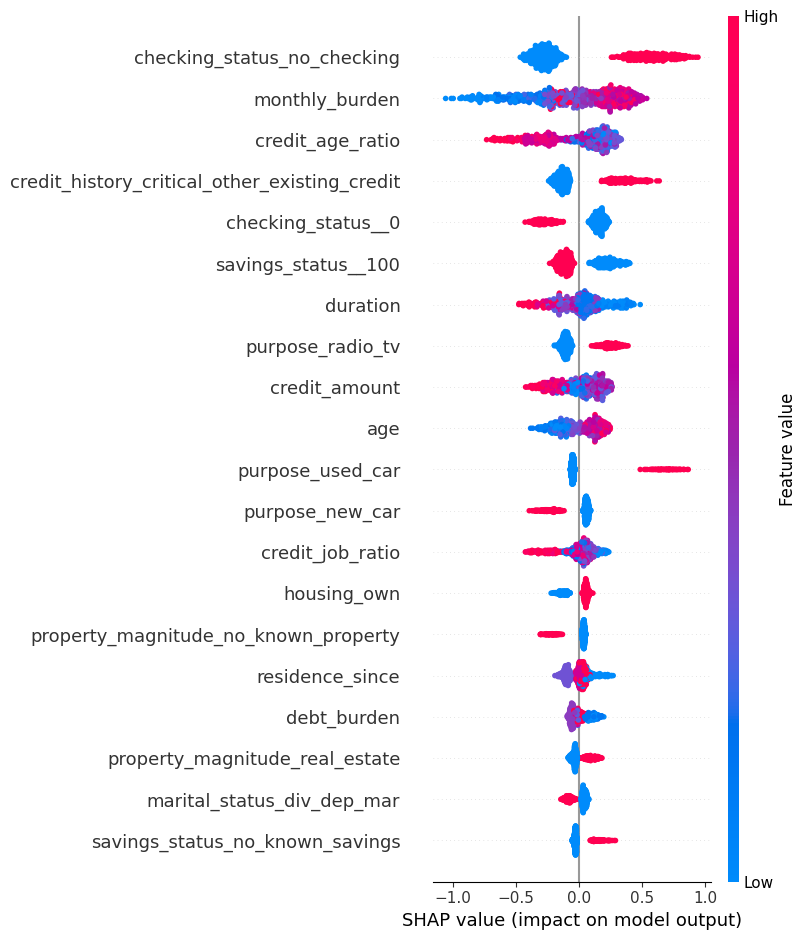

35
32


14                      checking_status_no_checking
10                                   monthly_burden
9                                  credit_age_ratio
16    credit_history_critical_other_existing_credit
13                               checking_status__0
23                              savings_status__100
0                                          duration
20                                 purpose_radio_tv
1                                     credit_amount
4                                               age
21                                 purpose_used_car
19                                  purpose_new_car
8                                  credit_job_ratio
32                                      housing_own
28             property_magnitude_no_known_property
3                                   residence_since
11                                      debt_burden
29                   property_magnitude_real_estate
34                       marital_status_div_dep_mar
25          

In [38]:
imp_features, non_zero_imp_features = apply_shap(model, X_train)
imp_features

In [39]:
len(imp_features.to_list())
imp_features.to_list()

['checking_status_no_checking',
 'monthly_burden',
 'credit_age_ratio',
 'credit_history_critical_other_existing_credit',
 'checking_status__0',
 'savings_status__100',
 'duration',
 'purpose_radio_tv',
 'credit_amount',
 'age',
 'purpose_used_car',
 'purpose_new_car',
 'credit_job_ratio',
 'housing_own',
 'property_magnitude_no_known_property',
 'residence_since',
 'debt_burden',
 'property_magnitude_real_estate',
 'marital_status_div_dep_mar',
 'savings_status_no_known_savings',
 'other_payment_plans_bank',
 'checking_status_0__X_200',
 'installment_commitment',
 'employment_4__X_7',
 'housing_rent',
 'employment__1',
 'existing_credits',
 'job',
 'num_dependents',
 'purpose_education',
 'credit_history_no_credits_all_paid',
 'housing_for_free',
 'credit_history_all_paid',
 'savings_status_500__X_1000',
 'savings_status___1000']

In [40]:
non_zero_imp_features

,Feature,SHAP Importance
14,checking_status_no_checking,0.394367
10,monthly_burden,0.285654
9,credit_age_ratio,0.221741
16,credit_history_critical_other_existing_credit,0.201763
13,checking_status__0,0.196282
23,savings_status__100,0.160102
0,duration,0.148876
20,purpose_radio_tv,0.146993
1,credit_amount,0.137406
4,age,0.129612


#### Hyperparameter Tuning

In [49]:
import json
def split_and_train(X, y, best_params):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

    # Tune hyperparameters using Optuna
    # if flag:
    #     best_params = tune_xgboost(X_train, y_train)

    # Define XGBoost model with class weight
    model = xgb.XGBClassifier(**best_params)

    # Train model
    model.fit(X_train, y_train)

    eval_clf, clf_report_train, clf_report_test = evaluating_clf_models(model, f"XGBOOST", X_train, y_train, X_test, y_test)


    with open("results/freature_decrement.txt", "a") as file:
        file.write(f"\n\nResult with {len(X_train.columns)} features: {X_train.columns}\n")

        file.write("=" * 25 + " Best Parameters " + "=" * 25 + "\n")
        json.dump(best_params, file, indent=4)  # Save in JSON format with indentation
        file.write("\n")

        file.write("=" * 25 + " Whole Classification Report " + "=" * 25 + "\n")
        json.dump(eval_clf, file, indent=4)  # Save in JSON format with indentation
        file.write("\n")

        file.write("=" * 25 + " Classification Report of Training " + "=" * 25 + "\n")
        file.write(clf_report_train + "\n")

        file.write("=" * 25 + " Classification Report of Testing " + "=" * 25 + "\n")
        file.write(clf_report_test + "\n")

        file.write("=" * 200 + "\n" + "="*200 + "\n\n")

    return X_train

In [50]:
len(non_zero_imp_features.Feature)

32

31 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio', 'housing_own', 'property_magnitude_no_known_property', 'residence_since', 'debt_burden', 'property_magnitude_real_estate', 'marital_status_div_dep_mar', 'savings_status_no_known_savings', 'other_payment_plans_bank', 'checking_status_0__X_200', 'installment_commitment', 'employment_4__X_7', 'housing_rent', 'employment__1', 'existing_credits', 'job', 'num_dependents', 'purpose_education', 'credit_history_no_credits_all_paid']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8742857142857143 
 		 test data:  0.7633333333333333
--------------------------------------------------
Precision is:
 		 trained data:  0.8681318681318682 
 		 test data:  0.7860082304526749
--------------------------------------------------
Recall is:
 		 trained data:  0.9673469387755103 
 		 test data:  0.9095238095238095
--------------------------------------------------
F1 score is:
 		 trained data:  0.915057915057915 
 		 test data:  0.8432671081677704


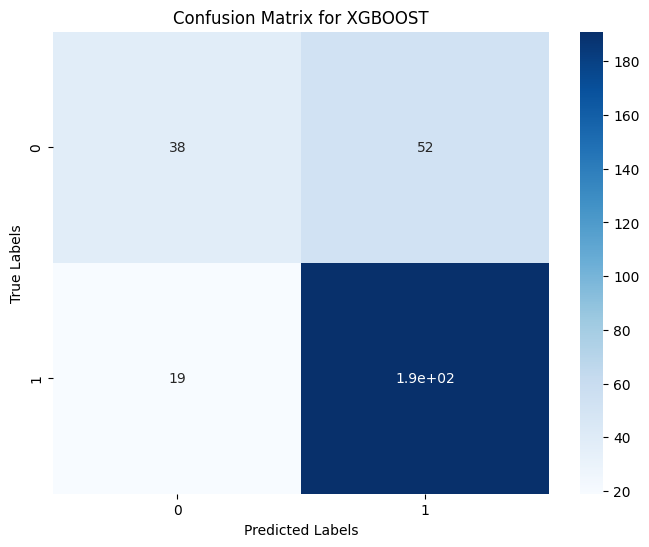

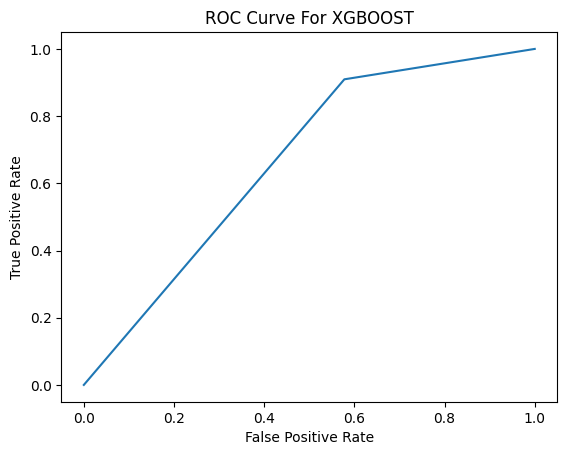



30 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio', 'housing_own', 'property_magnitude_no_known_property', 'residence_since', 'debt_burden', 'property_magnitude_real_estate', 'marital_status_div_dep_mar', 'savings_status_no_known_savings', 'other_payment_plans_bank', 'checking_status_0__X_200', 'installment_commitment', 'employment_4__X_7', 'housing_rent', 'employment__1', 'existing_credits', 'job', 'num_dependents', 'purpose_education']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8714285714285714 
 		 test data:  0.75
--------------------------------------------------
Precision is:
 		 trained data:  0.8663003663003663 
 		 test data:  0.7800829875518672
--------------------------------------------------
Recall is:
 		 trained data:  0.9653061224489796 
 		 test data:  0.8952380952380953
--------------------------------------------------
F1 score is:
 		 trained data:  0.9131274131274131 
 		 test data:  0.8337028824833703


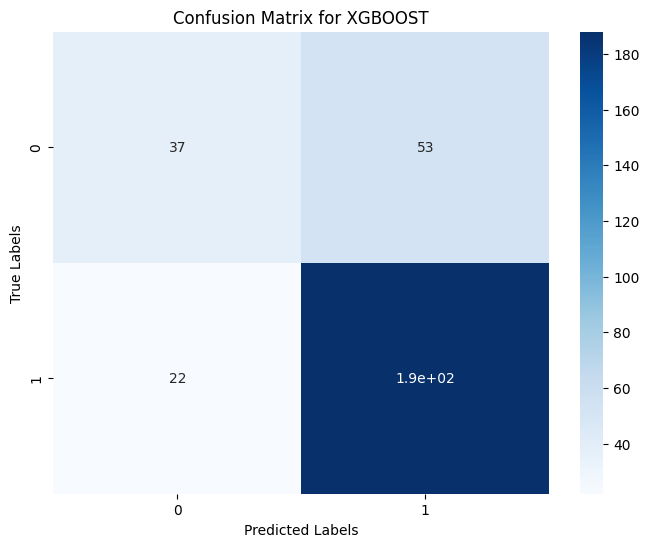

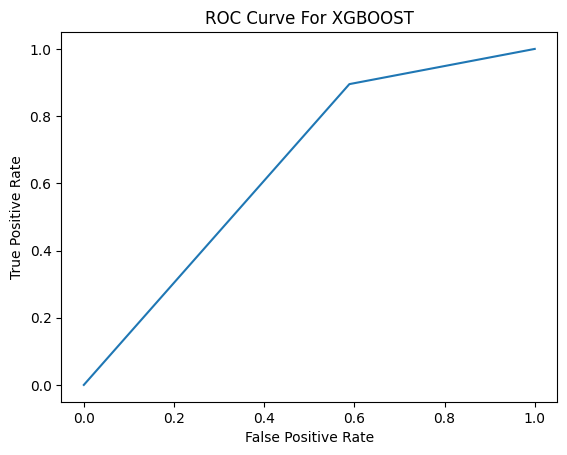



29 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio', 'housing_own', 'property_magnitude_no_known_property', 'residence_since', 'debt_burden', 'property_magnitude_real_estate', 'marital_status_div_dep_mar', 'savings_status_no_known_savings', 'other_payment_plans_bank', 'checking_status_0__X_200', 'installment_commitment', 'employment_4__X_7', 'housing_rent', 'employment__1', 'existing_credits', 'job', 'num_dependents']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8757142857142857 
 		 test data:  0.75
--------------------------------------------------
Precision is:
 		 trained data:  0.8697247706422019 
 		 test data:  0.7777777777777778
--------------------------------------------------
Recall is:
 		 trained data:  0.9673469387755103 
 		 test data:  0.9
--------------------------------------------------
F1 score is:
 		 trained data:  0.9159420289855073 
 		 test data:  0.8344370860927153


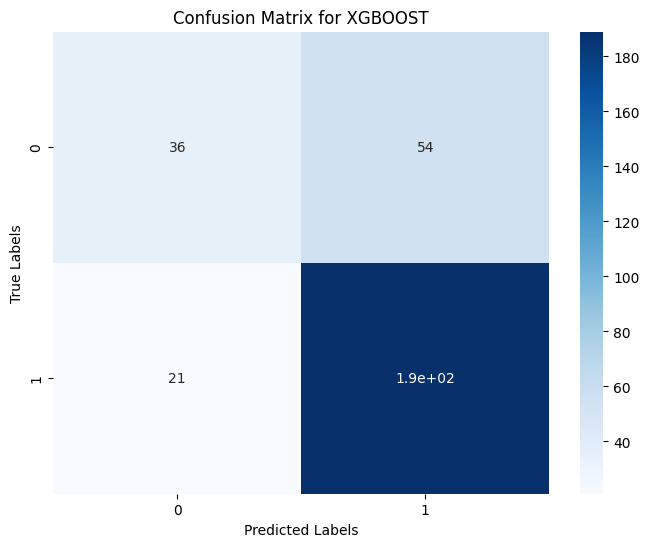

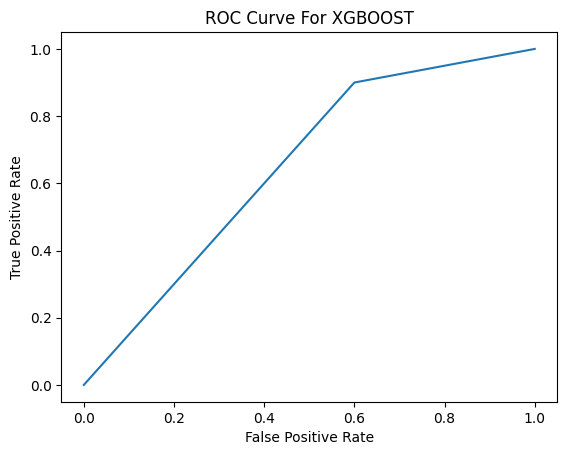



28 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio', 'housing_own', 'property_magnitude_no_known_property', 'residence_since', 'debt_burden', 'property_magnitude_real_estate', 'marital_status_div_dep_mar', 'savings_status_no_known_savings', 'other_payment_plans_bank', 'checking_status_0__X_200', 'installment_commitment', 'employment_4__X_7', 'housing_rent', 'employment__1', 'existing_credits', 'job']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8742857142857143 
 		 test data:  0.7566666666666667
--------------------------------------------------
Precision is:
 		 trained data:  0.8681318681318682 
 		 test data:  0.7795918367346939
--------------------------------------------------
Recall is:
 		 trained data:  0.9673469387755103 
 		 test data:  0.9095238095238095
--------------------------------------------------
F1 score is:
 		 trained data:  0.915057915057915 
 		 test data:  0.8395604395604396


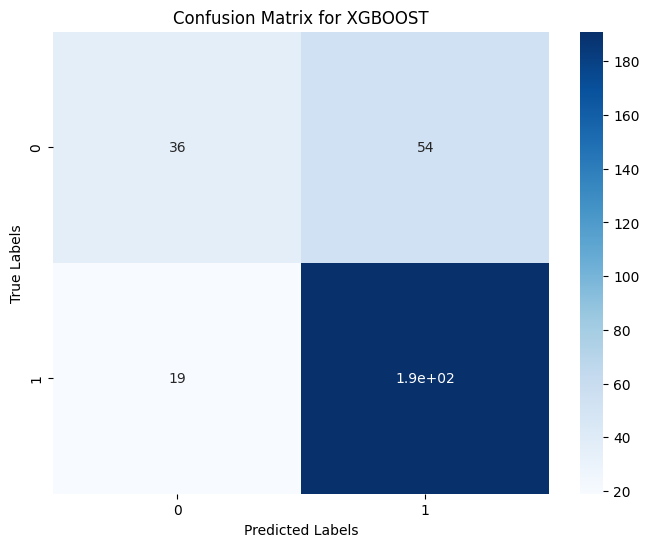

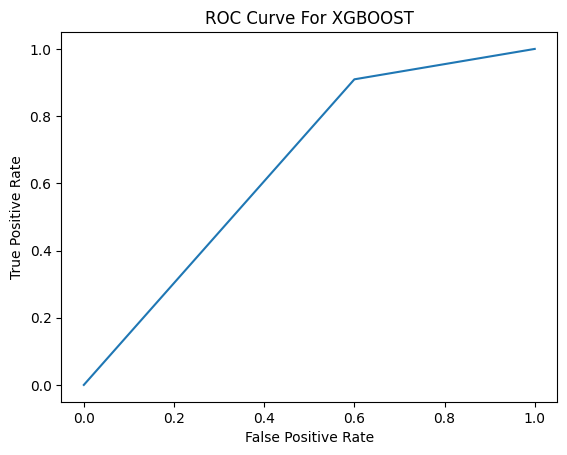



27 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio', 'housing_own', 'property_magnitude_no_known_property', 'residence_since', 'debt_burden', 'property_magnitude_real_estate', 'marital_status_div_dep_mar', 'savings_status_no_known_savings', 'other_payment_plans_bank', 'checking_status_0__X_200', 'installment_commitment', 'employment_4__X_7', 'housing_rent', 'employment__1', 'existing_credits']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8728571428571429 
 		 test data:  0.7633333333333333
--------------------------------------------------
Precision is:
 		 trained data:  0.8678899082568807 
 		 test data:  0.7860082304526749
--------------------------------------------------
Recall is:
 		 trained data:  0.9653061224489796 
 		 test data:  0.9095238095238095
--------------------------------------------------
F1 score is:
 		 trained data:  0.9140096618357488 
 		 test data:  0.8432671081677704


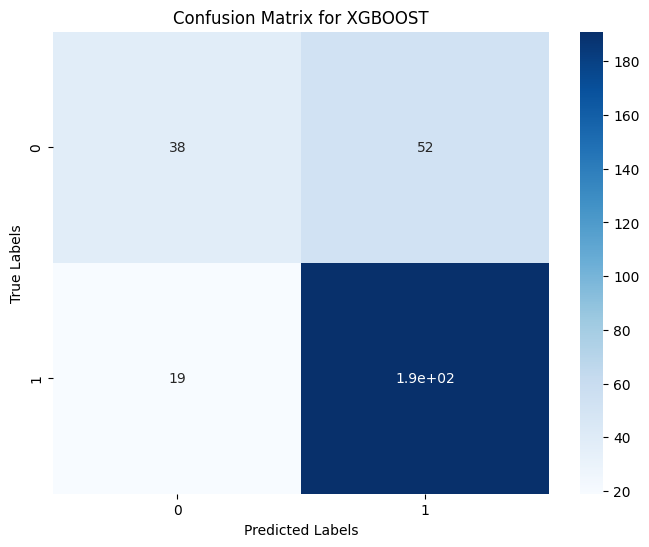

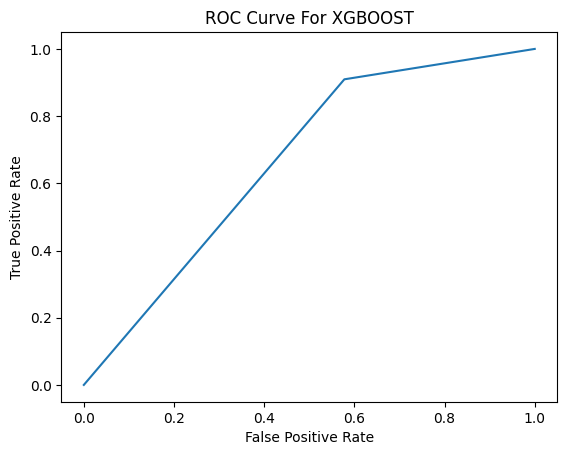



26 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio', 'housing_own', 'property_magnitude_no_known_property', 'residence_since', 'debt_burden', 'property_magnitude_real_estate', 'marital_status_div_dep_mar', 'savings_status_no_known_savings', 'other_payment_plans_bank', 'checking_status_0__X_200', 'installment_commitment', 'employment_4__X_7', 'housing_rent', 'employment__1']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8785714285714286 
 		 test data:  0.76
--------------------------------------------------
Precision is:
 		 trained data:  0.8715596330275229 
 		 test data:  0.7827868852459017
--------------------------------------------------
Recall is:
 		 trained data:  0.9693877551020408 
 		 test data:  0.9095238095238095
--------------------------------------------------
F1 score is:
 		 trained data:  0.9178743961352657 
 		 test data:  0.8414096916299559


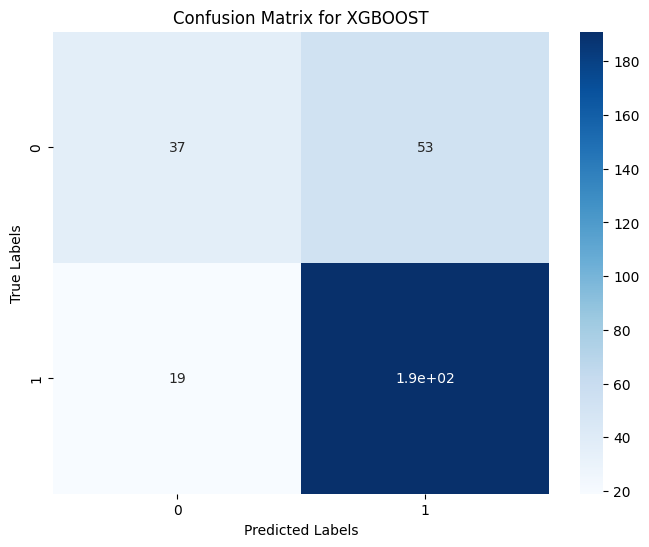

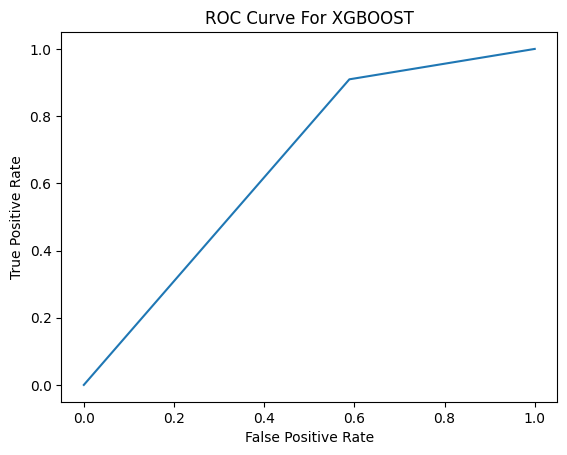



25 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio', 'housing_own', 'property_magnitude_no_known_property', 'residence_since', 'debt_burden', 'property_magnitude_real_estate', 'marital_status_div_dep_mar', 'savings_status_no_known_savings', 'other_payment_plans_bank', 'checking_status_0__X_200', 'installment_commitment', 'employment_4__X_7', 'housing_rent']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8771428571428571 
 		 test data:  0.76
--------------------------------------------------
Precision is:
 		 trained data:  0.8726937269372693 
 		 test data:  0.7851239669421488
--------------------------------------------------
Recall is:
 		 trained data:  0.9653061224489796 
 		 test data:  0.9047619047619048
--------------------------------------------------
F1 score is:
 		 trained data:  0.9166666666666666 
 		 test data:  0.8407079646017699


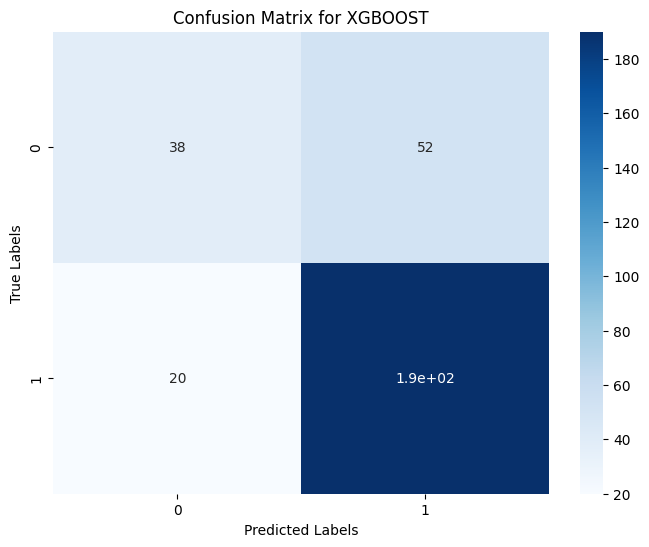

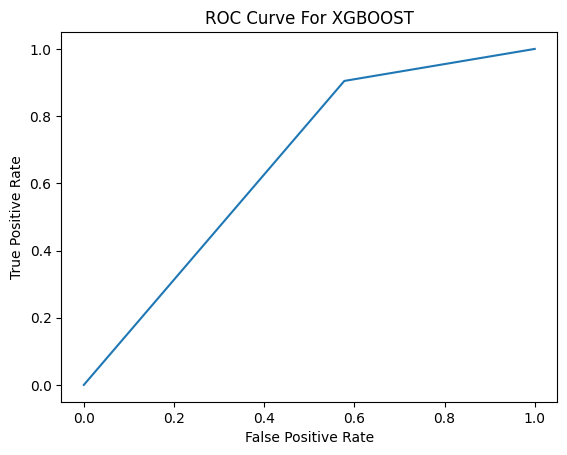



24 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio', 'housing_own', 'property_magnitude_no_known_property', 'residence_since', 'debt_burden', 'property_magnitude_real_estate', 'marital_status_div_dep_mar', 'savings_status_no_known_savings', 'other_payment_plans_bank', 'checking_status_0__X_200', 'installment_commitment', 'employment_4__X_7']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8785714285714286 
 		 test data:  0.7633333333333333
--------------------------------------------------
Precision is:
 		 trained data:  0.8743068391866913 
 		 test data:  0.7836734693877551
--------------------------------------------------
Recall is:
 		 trained data:  0.9653061224489796 
 		 test data:  0.9142857142857143
--------------------------------------------------
F1 score is:
 		 trained data:  0.9175557710960233 
 		 test data:  0.843956043956044


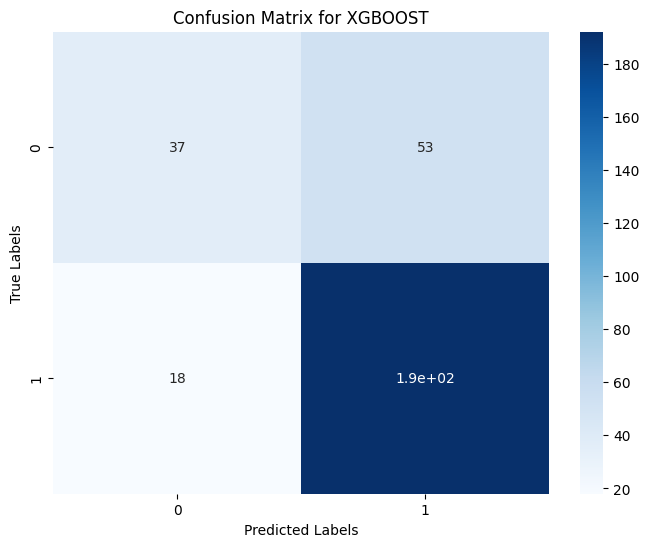

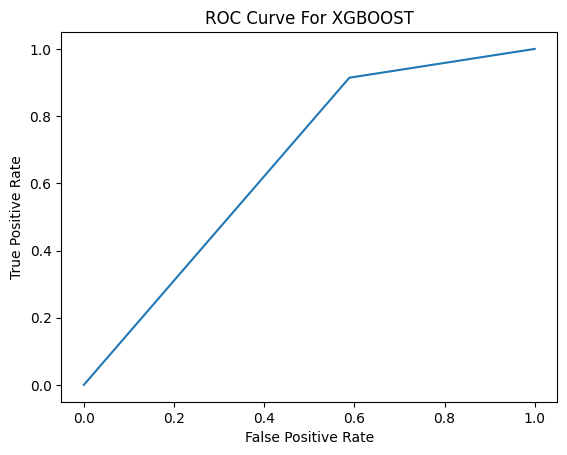



23 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio', 'housing_own', 'property_magnitude_no_known_property', 'residence_since', 'debt_burden', 'property_magnitude_real_estate', 'marital_status_div_dep_mar', 'savings_status_no_known_savings', 'other_payment_plans_bank', 'checking_status_0__X_200', 'installment_commitment']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.87 
 		 test data:  0.75
--------------------------------------------------
Precision is:
 		 trained data:  0.8715083798882681 
 		 test data:  0.7755102040816326
--------------------------------------------------
Recall is:
 		 trained data:  0.9551020408163265 
 		 test data:  0.9047619047619048
--------------------------------------------------
F1 score is:
 		 trained data:  0.9113924050632911 
 		 test data:  0.8351648351648352


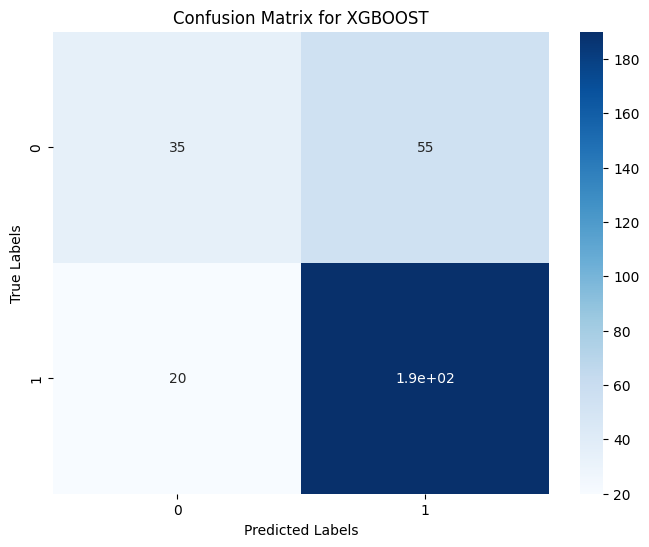

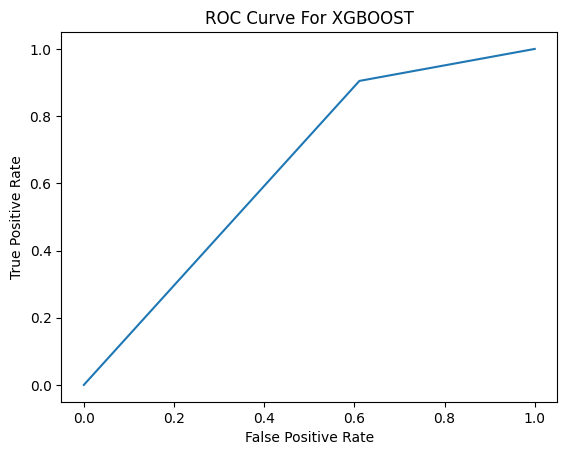



22 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio', 'housing_own', 'property_magnitude_no_known_property', 'residence_since', 'debt_burden', 'property_magnitude_real_estate', 'marital_status_div_dep_mar', 'savings_status_no_known_savings', 'other_payment_plans_bank', 'checking_status_0__X_200']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8685714285714285 
 		 test data:  0.7533333333333333
--------------------------------------------------
Precision is:
 		 trained data:  0.8685185185185185 
 		 test data:  0.7833333333333333
--------------------------------------------------
Recall is:
 		 trained data:  0.9571428571428572 
 		 test data:  0.8952380952380953
--------------------------------------------------
F1 score is:
 		 trained data:  0.9106796116504854 
 		 test data:  0.8355555555555556


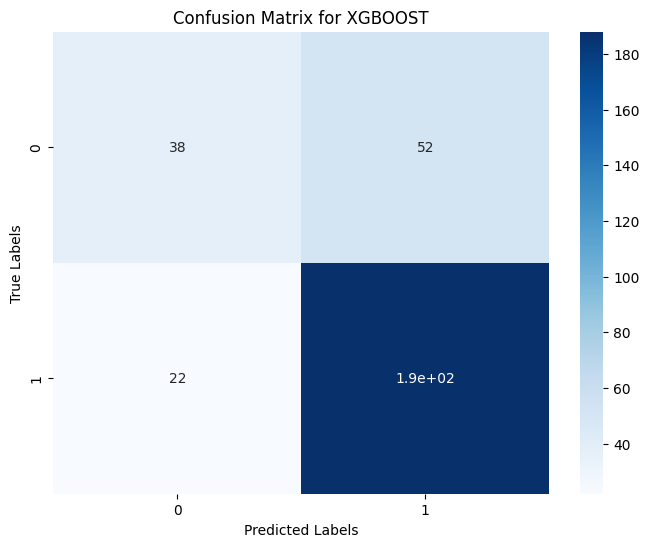

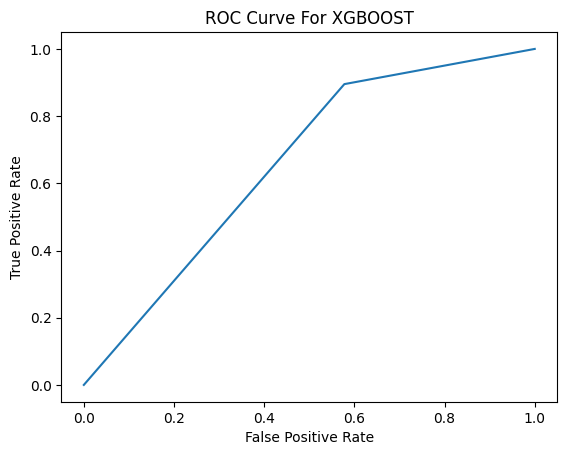



21 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio', 'housing_own', 'property_magnitude_no_known_property', 'residence_since', 'debt_burden', 'property_magnitude_real_estate', 'marital_status_div_dep_mar', 'savings_status_no_known_savings', 'other_payment_plans_bank']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8685714285714285 
 		 test data:  0.7366666666666667
--------------------------------------------------
Precision is:
 		 trained data:  0.8685185185185185 
 		 test data:  0.7673469387755102
--------------------------------------------------
Recall is:
 		 trained data:  0.9571428571428572 
 		 test data:  0.8952380952380953
--------------------------------------------------
F1 score is:
 		 trained data:  0.9106796116504854 
 		 test data:  0.8263736263736263


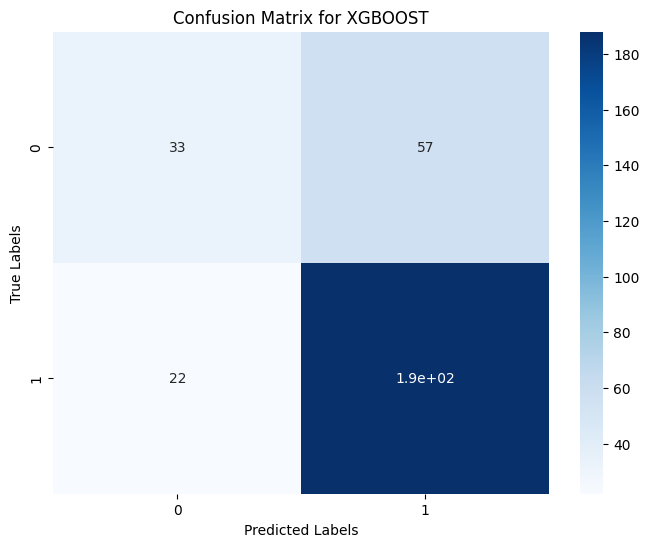

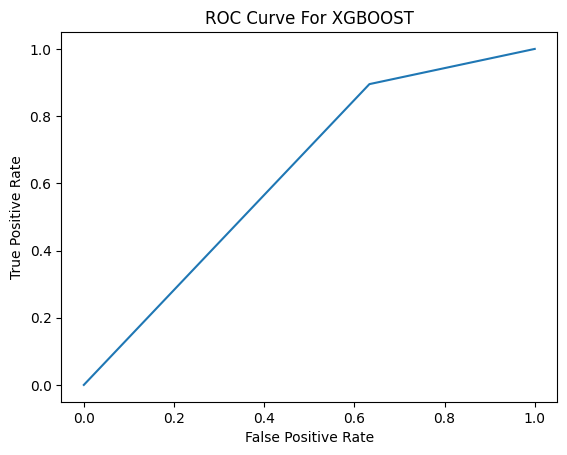



20 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio', 'housing_own', 'property_magnitude_no_known_property', 'residence_since', 'debt_burden', 'property_magnitude_real_estate', 'marital_status_div_dep_mar', 'savings_status_no_known_savings']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8728571428571429 
 		 test data:  0.7333333333333333
--------------------------------------------------
Precision is:
 		 trained data:  0.8692449355432781 
 		 test data:  0.7708333333333334
--------------------------------------------------
Recall is:
 		 trained data:  0.963265306122449 
 		 test data:  0.8809523809523809
--------------------------------------------------
F1 score is:
 		 trained data:  0.9138431752178122 
 		 test data:  0.8222222222222222


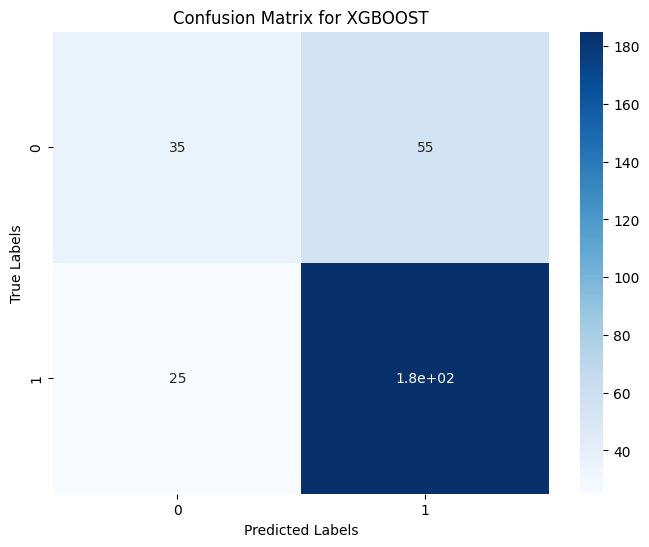

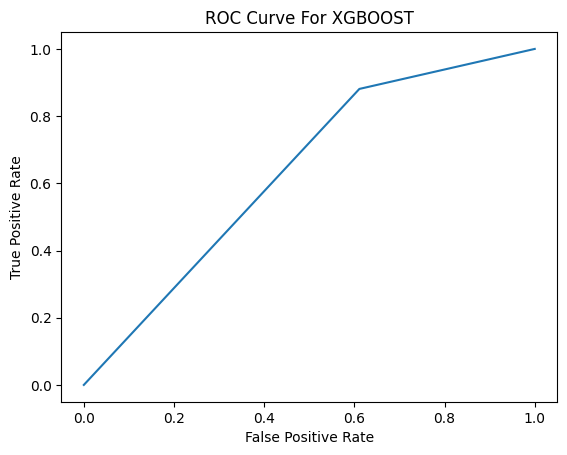



19 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio', 'housing_own', 'property_magnitude_no_known_property', 'residence_since', 'debt_burden', 'property_magnitude_real_estate', 'marital_status_div_dep_mar']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8685714285714285 
 		 test data:  0.7433333333333333
--------------------------------------------------
Precision is:
 		 trained data:  0.8726591760299626 
 		 test data:  0.7736625514403292
--------------------------------------------------
Recall is:
 		 trained data:  0.9510204081632653 
 		 test data:  0.8952380952380953
--------------------------------------------------
F1 score is:
 		 trained data:  0.91015625 
 		 test data:  0.8300220750551877


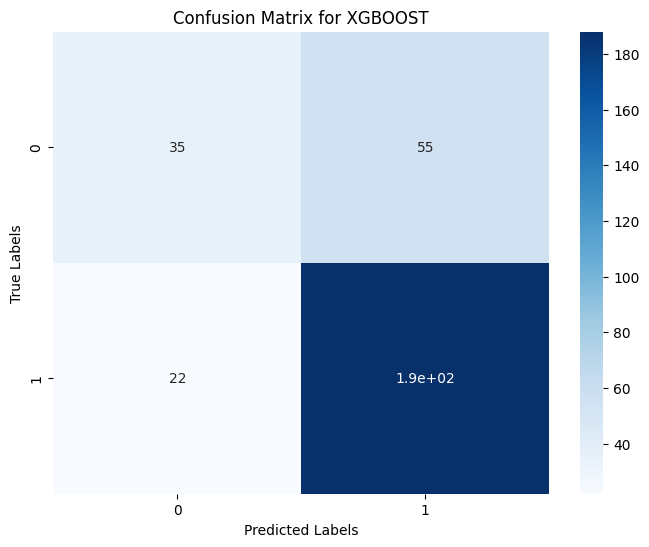

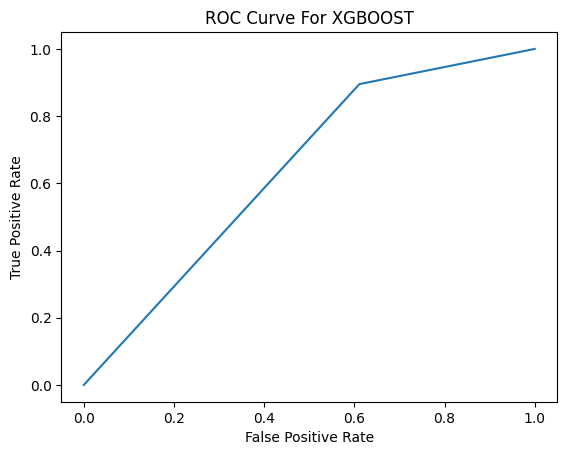



18 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio', 'housing_own', 'property_magnitude_no_known_property', 'residence_since', 'debt_burden', 'property_magnitude_real_estate']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.86 
 		 test data:  0.7433333333333333
--------------------------------------------------
Precision is:
 		 trained data:  0.8670411985018727 
 		 test data:  0.7736625514403292
--------------------------------------------------
Recall is:
 		 trained data:  0.9448979591836735 
 		 test data:  0.8952380952380953
--------------------------------------------------
F1 score is:
 		 trained data:  0.904296875 
 		 test data:  0.8300220750551877


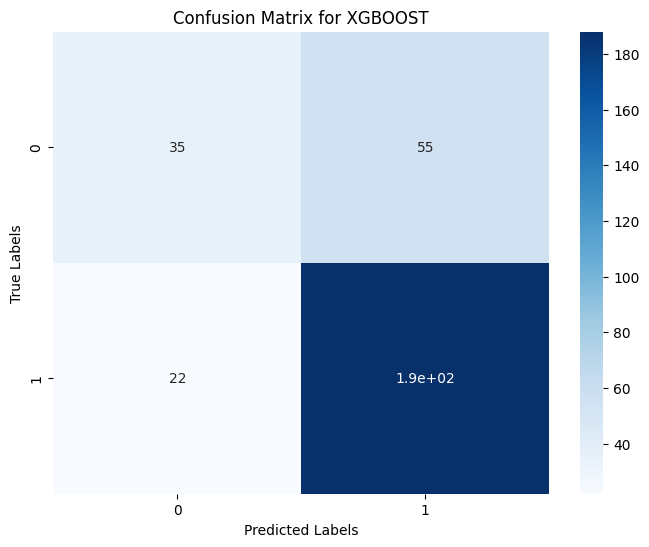

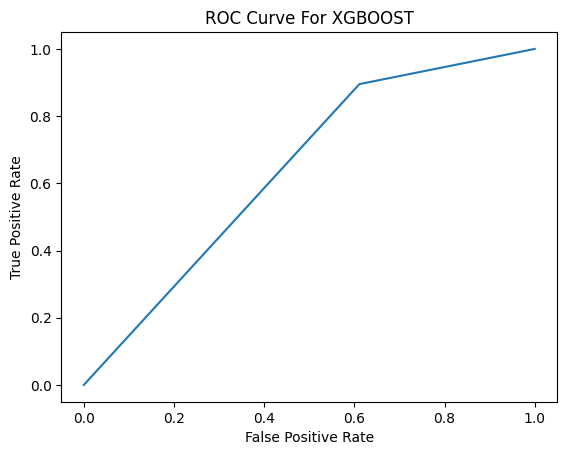



17 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio', 'housing_own', 'property_magnitude_no_known_property', 'residence_since', 'debt_burden']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8585714285714285 
 		 test data:  0.7333333333333333
--------------------------------------------------
Precision is:
 		 trained data:  0.8613678373382625 
 		 test data:  0.768595041322314
--------------------------------------------------
Recall is:
 		 trained data:  0.9510204081632653 
 		 test data:  0.8857142857142857
--------------------------------------------------
F1 score is:
 		 trained data:  0.903976721629486 
 		 test data:  0.8230088495575221


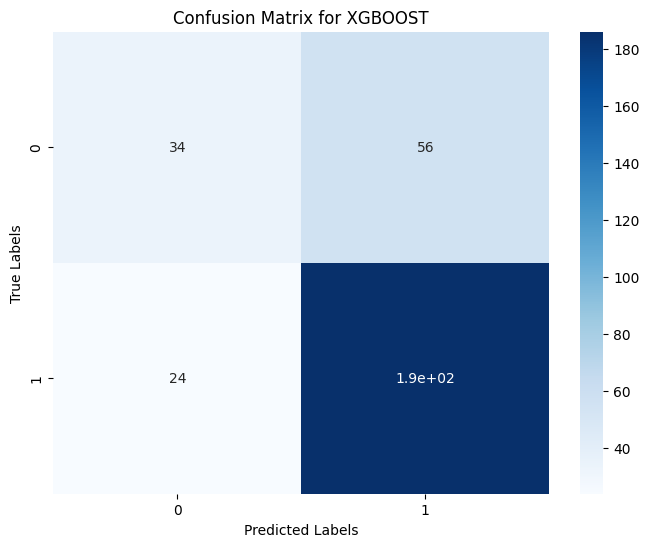

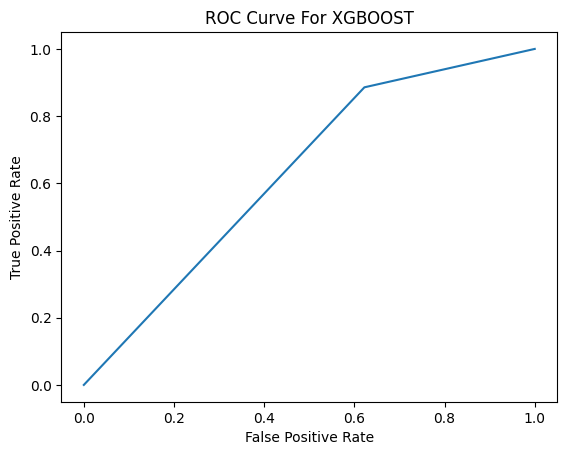



16 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio', 'housing_own', 'property_magnitude_no_known_property', 'residence_since']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8728571428571429 
 		 test data:  0.74
--------------------------------------------------
Precision is:
 		 trained data:  0.8719851576994434 
 		 test data:  0.775
--------------------------------------------------
Recall is:
 		 trained data:  0.9591836734693877 
 		 test data:  0.8857142857142857
--------------------------------------------------
F1 score is:
 		 trained data:  0.9135082604470359 
 		 test data:  0.8266666666666667


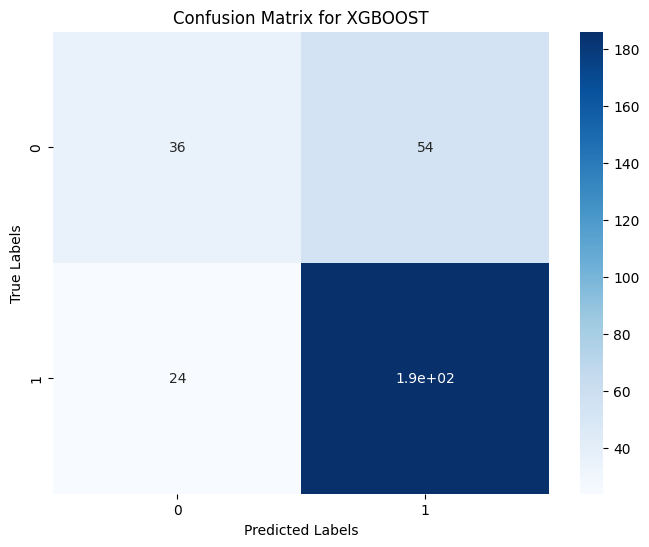

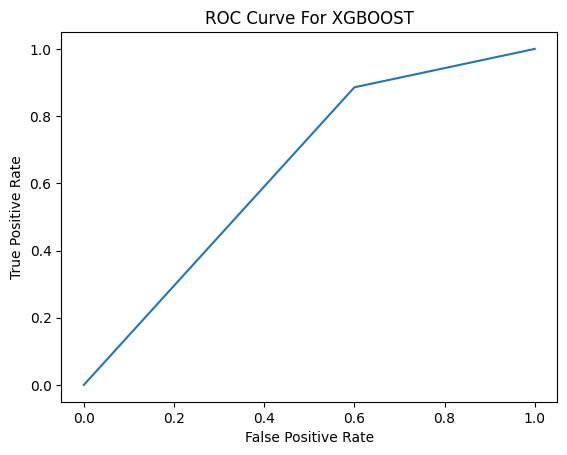



15 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio', 'housing_own', 'property_magnitude_no_known_property']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8585714285714285 
 		 test data:  0.7433333333333333
--------------------------------------------------
Precision is:
 		 trained data:  0.8640595903165735 
 		 test data:  0.7782426778242678
--------------------------------------------------
Recall is:
 		 trained data:  0.9469387755102041 
 		 test data:  0.8857142857142857
--------------------------------------------------
F1 score is:
 		 trained data:  0.9036027263875365 
 		 test data:  0.8285077951002228


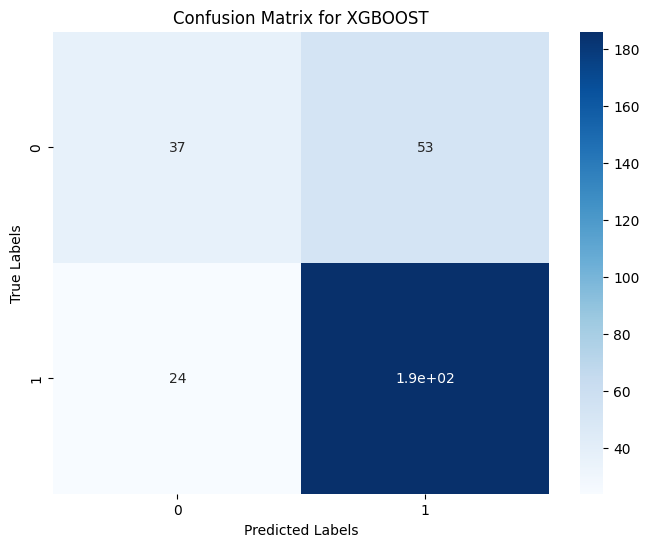

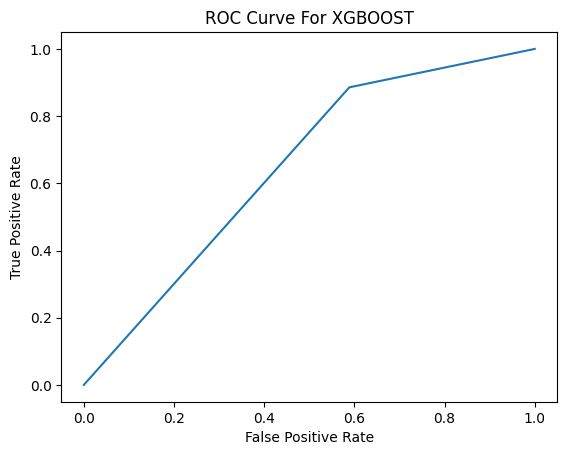



14 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio', 'housing_own']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8585714285714285 
 		 test data:  0.7366666666666667
--------------------------------------------------
Precision is:
 		 trained data:  0.862708719851577 
 		 test data:  0.7763713080168776
--------------------------------------------------
Recall is:
 		 trained data:  0.9489795918367347 
 		 test data:  0.8761904761904762
--------------------------------------------------
F1 score is:
 		 trained data:  0.9037900874635568 
 		 test data:  0.8232662192393736


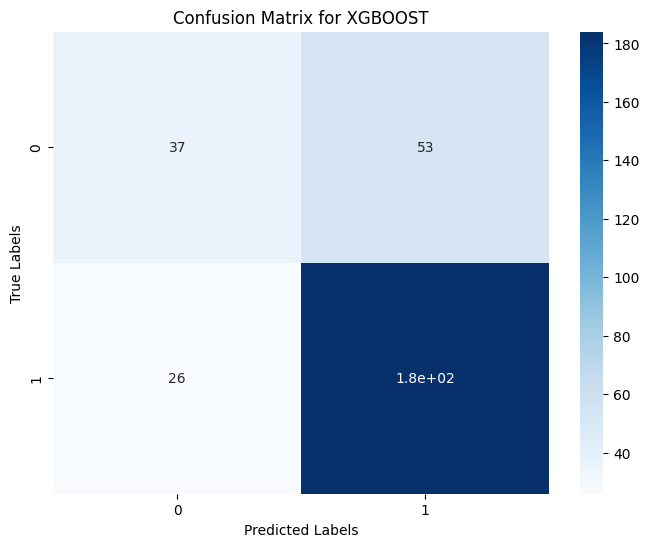

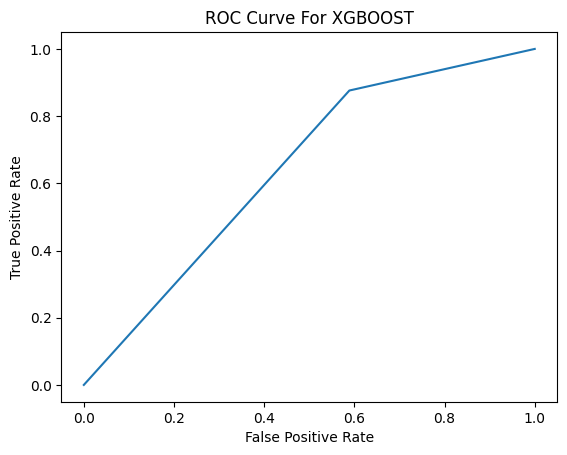



13 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car', 'credit_job_ratio']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8542857142857143 
 		 test data:  0.74
--------------------------------------------------
Precision is:
 		 trained data:  0.8527272727272728 
 		 test data:  0.7682926829268293
--------------------------------------------------
Recall is:
 		 trained data:  0.9571428571428572 
 		 test data:  0.9
--------------------------------------------------
F1 score is:
 		 trained data:  0.9019230769230769 
 		 test data:  0.8289473684210527


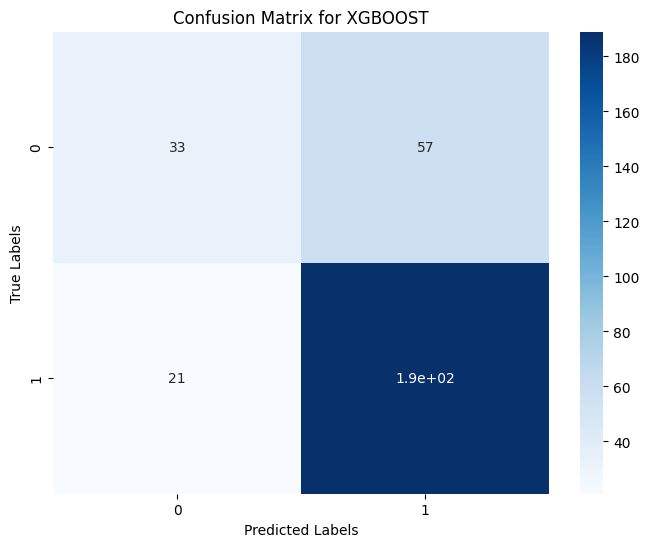

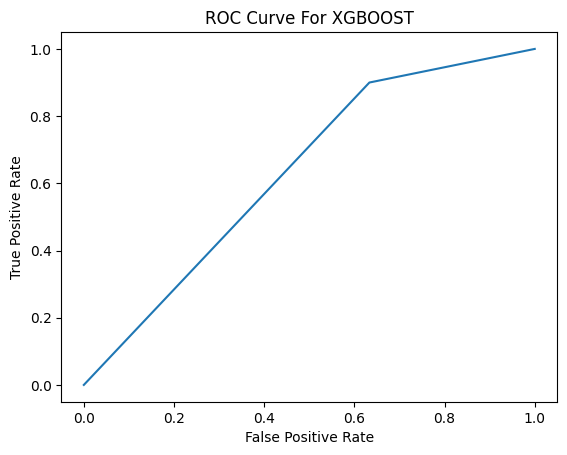



12 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car', 'purpose_new_car']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8528571428571429 
 		 test data:  0.7433333333333333
--------------------------------------------------
Precision is:
 		 trained data:  0.8524590163934426 
 		 test data:  0.7736625514403292
--------------------------------------------------
Recall is:
 		 trained data:  0.9551020408163265 
 		 test data:  0.8952380952380953
--------------------------------------------------
F1 score is:
 		 trained data:  0.9008662175168431 
 		 test data:  0.8300220750551877


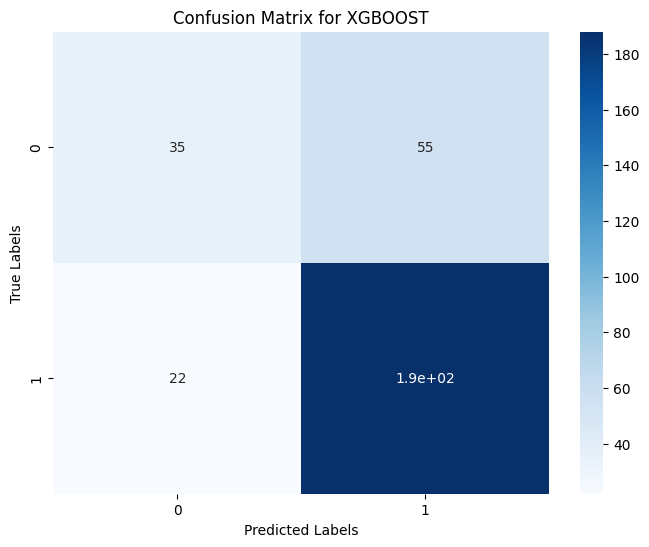

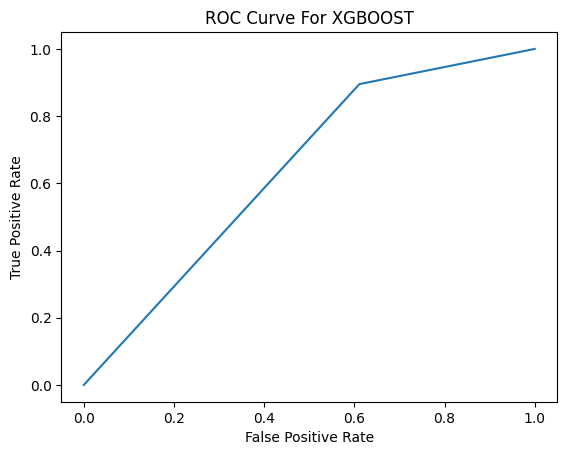



11 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age', 'purpose_used_car']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8542857142857143 
 		 test data:  0.7333333333333333
--------------------------------------------------
Precision is:
 		 trained data:  0.8553113553113553 
 		 test data:  0.7708333333333334
--------------------------------------------------
Recall is:
 		 trained data:  0.9530612244897959 
 		 test data:  0.8809523809523809
--------------------------------------------------
F1 score is:
 		 trained data:  0.9015444015444015 
 		 test data:  0.8222222222222222


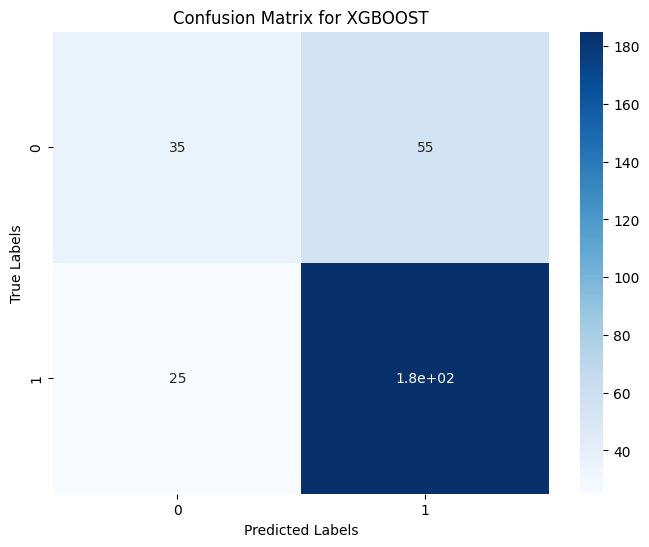

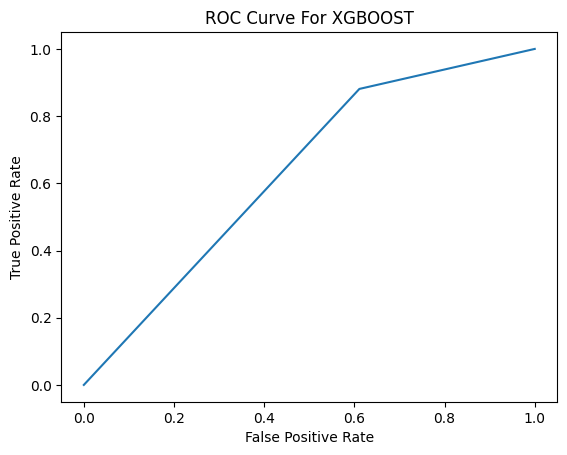



10 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount', 'age']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8485714285714285 
 		 test data:  0.7366666666666667
--------------------------------------------------
Precision is:
 		 trained data:  0.8490909090909091 
 		 test data:  0.7609561752988048
--------------------------------------------------
Recall is:
 		 trained data:  0.9530612244897959 
 		 test data:  0.9095238095238095
--------------------------------------------------
F1 score is:
 		 trained data:  0.8980769230769231 
 		 test data:  0.8286334056399133


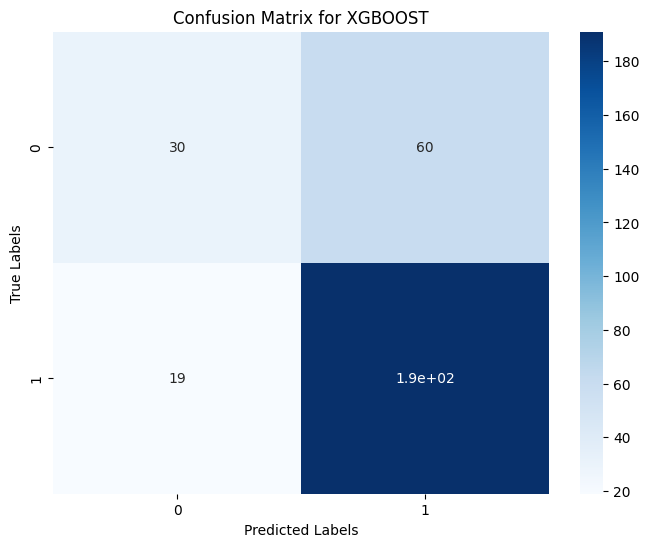

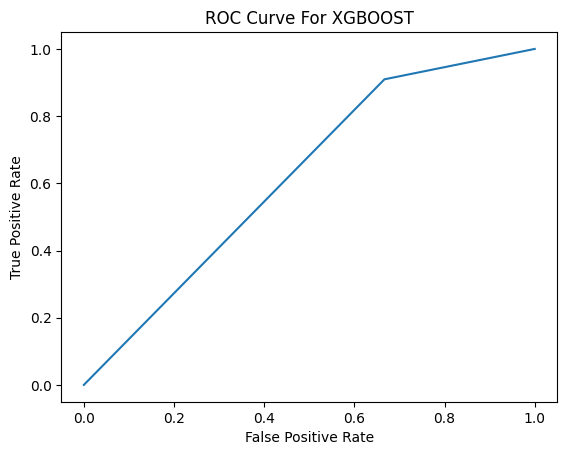



9 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv', 'credit_amount']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8414285714285714 
 		 test data:  0.7266666666666667
--------------------------------------------------
Precision is:
 		 trained data:  0.8426763110307414 
 		 test data:  0.7519685039370079
--------------------------------------------------
Recall is:
 		 trained data:  0.9510204081632653 
 		 test data:  0.9095238095238095
--------------------------------------------------
F1 score is:
 		 trained data:  0.8935762224352828 
 		 test data:  0.8232758620689655


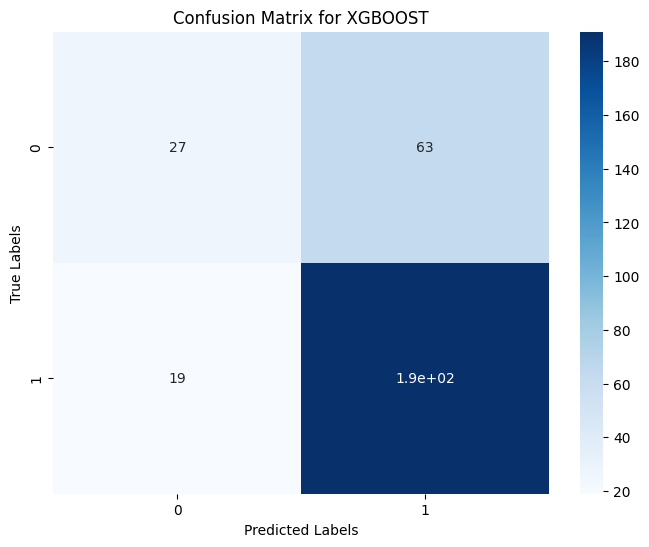

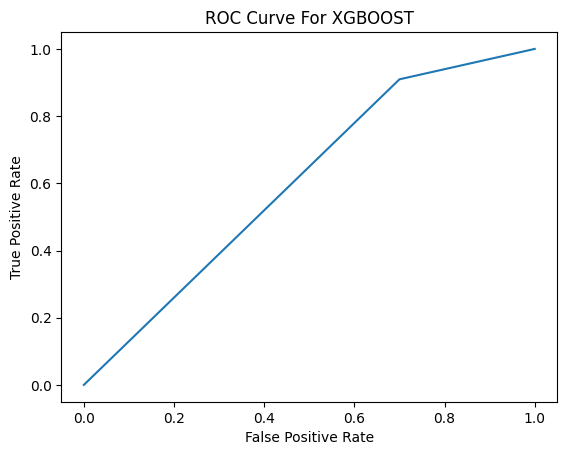



8 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration', 'purpose_radio_tv']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8314285714285714 
 		 test data:  0.74
--------------------------------------------------
Precision is:
 		 trained data:  0.8321428571428572 
 		 test data:  0.7598425196850394
--------------------------------------------------
Recall is:
 		 trained data:  0.9510204081632653 
 		 test data:  0.919047619047619
--------------------------------------------------
F1 score is:
 		 trained data:  0.8876190476190476 
 		 test data:  0.8318965517241379


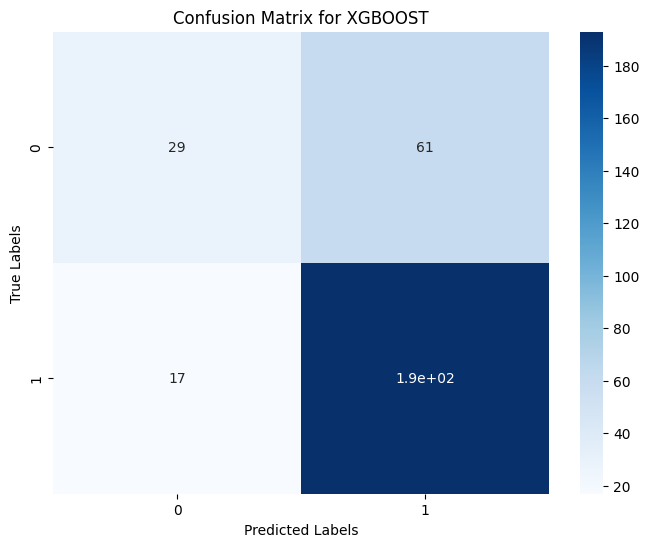

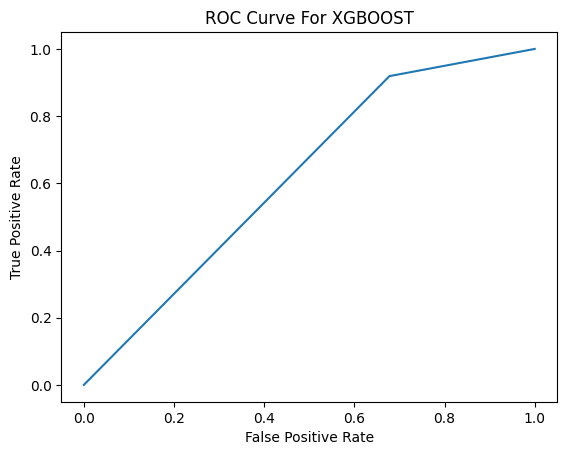



7 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100', 'duration']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8242857142857143 
 		 test data:  0.74
--------------------------------------------------
Precision is:
 		 trained data:  0.8259325044404974 
 		 test data:  0.7619047619047619
--------------------------------------------------
Recall is:
 		 trained data:  0.9489795918367347 
 		 test data:  0.9142857142857143
--------------------------------------------------
F1 score is:
 		 trained data:  0.8831908831908832 
 		 test data:  0.8311688311688312


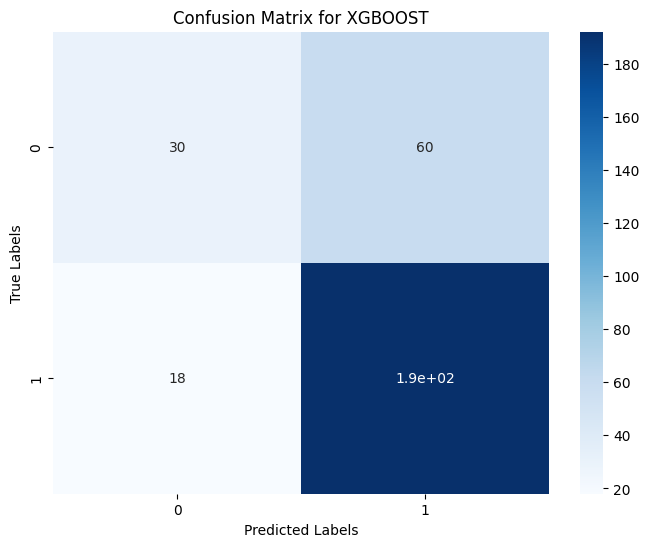

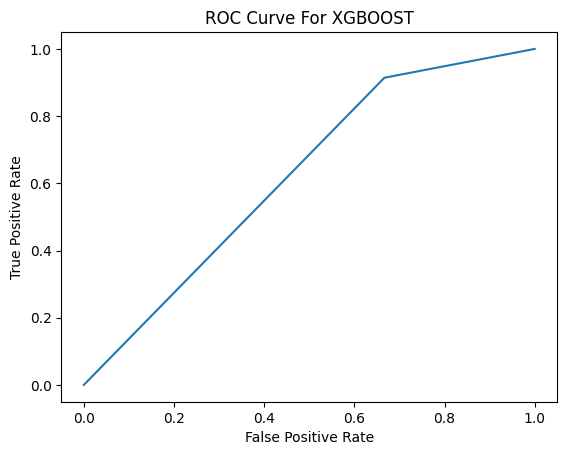



6 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0', 'savings_status__100']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8242857142857143 
 		 test data:  0.73
--------------------------------------------------
Precision is:
 		 trained data:  0.829443447037702 
 		 test data:  0.7549407114624506
--------------------------------------------------
Recall is:
 		 trained data:  0.9428571428571428 
 		 test data:  0.9095238095238095
--------------------------------------------------
F1 score is:
 		 trained data:  0.8825214899713467 
 		 test data:  0.8250539956803455


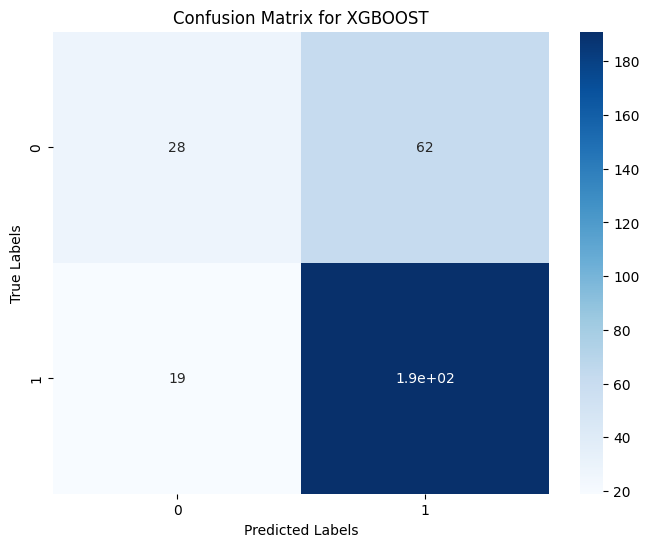

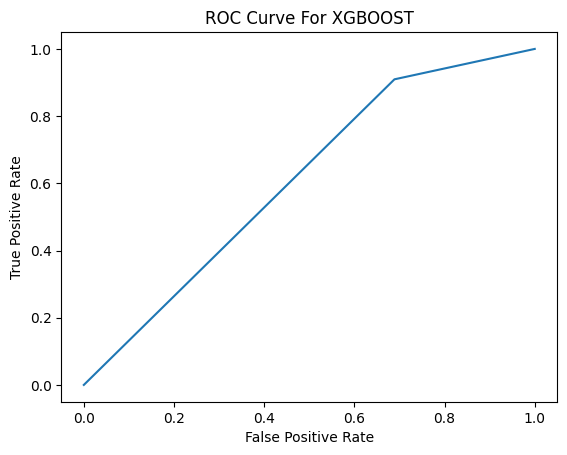



5 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit', 'checking_status__0']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8228571428571428 
 		 test data:  0.73
--------------------------------------------------
Precision is:
 		 trained data:  0.824468085106383 
 		 test data:  0.7529411764705882
--------------------------------------------------
Recall is:
 		 trained data:  0.9489795918367347 
 		 test data:  0.9142857142857143
--------------------------------------------------
F1 score is:
 		 trained data:  0.8823529411764706 
 		 test data:  0.8258064516129032


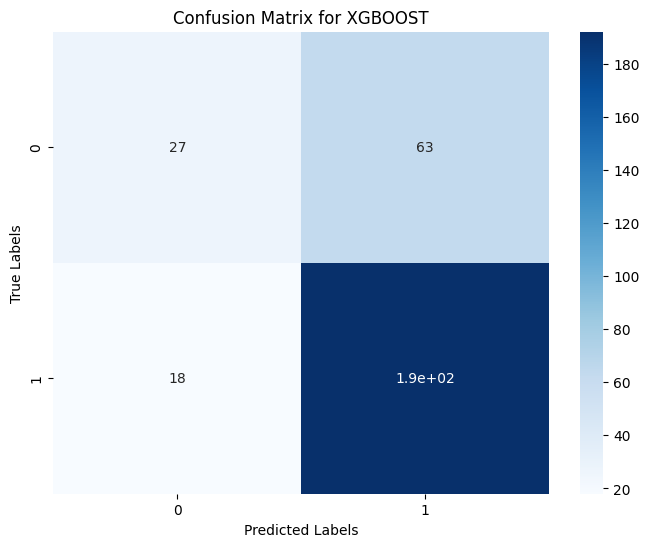

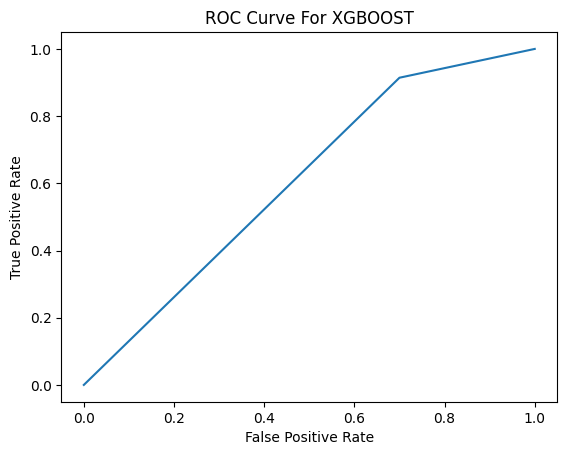



4 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio', 'credit_history_critical_other_existing_credit']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.8128571428571428 
 		 test data:  0.6833333333333333
--------------------------------------------------
Precision is:
 		 trained data:  0.8154657293497364 
 		 test data:  0.7272727272727273
--------------------------------------------------
Recall is:
 		 trained data:  0.9469387755102041 
 		 test data:  0.8761904761904762
--------------------------------------------------
F1 score is:
 		 trained data:  0.8762983947119924 
 		 test data:  0.7948164146868251


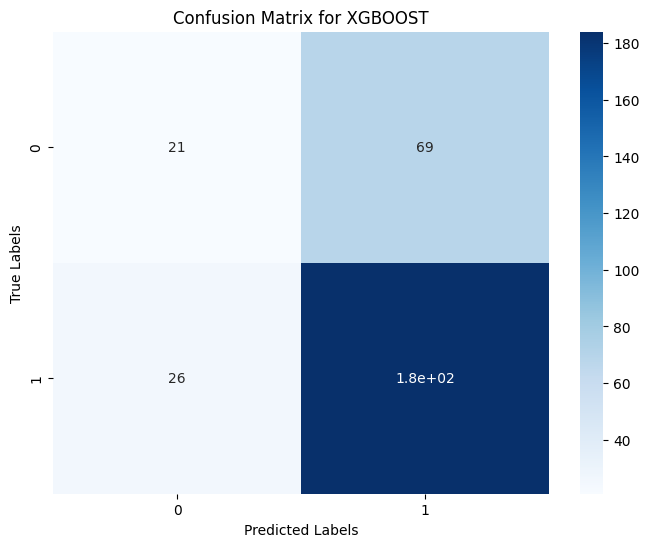

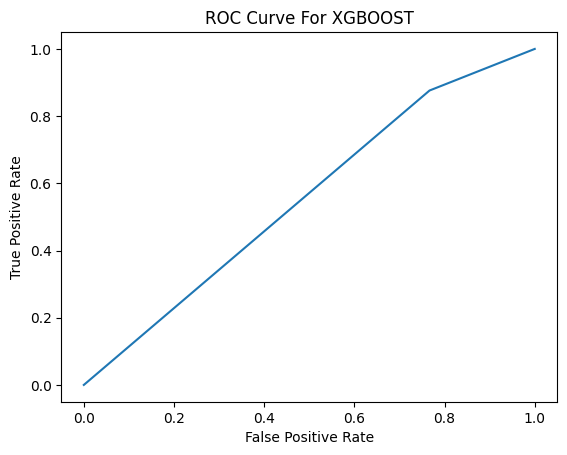



3 ['checking_status_no_checking', 'monthly_burden', 'credit_age_ratio']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.81 
 		 test data:  0.7033333333333334
--------------------------------------------------
Precision is:
 		 trained data:  0.8181818181818182 
 		 test data:  0.7449392712550608
--------------------------------------------------
Recall is:
 		 trained data:  0.936734693877551 
 		 test data:  0.8761904761904762
--------------------------------------------------
F1 score is:
 		 trained data:  0.873453853472883 
 		 test data:  0.8052516411378556


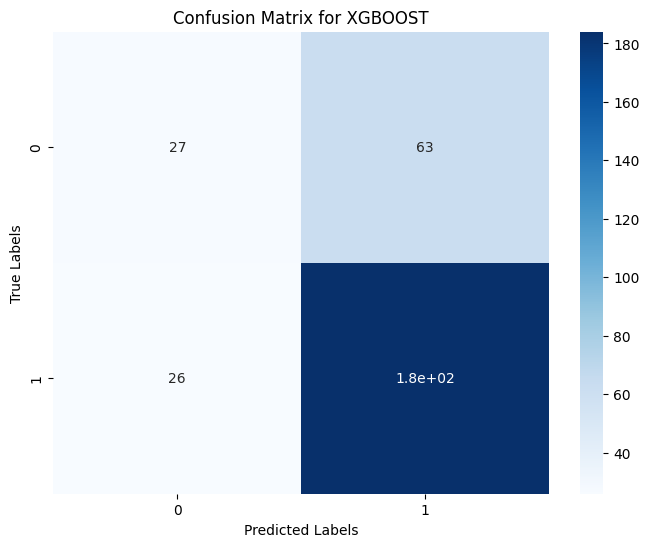

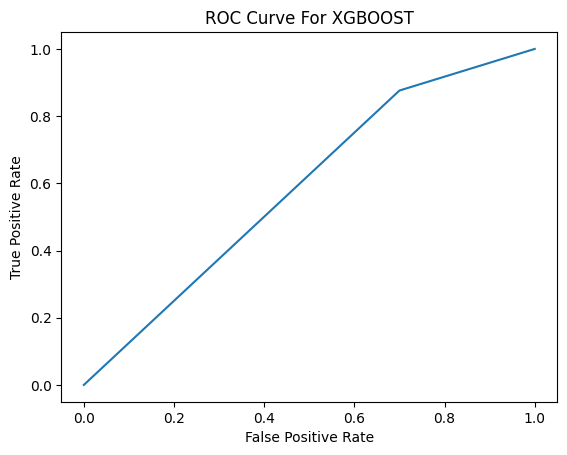



2 ['checking_status_no_checking', 'monthly_burden']
========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.7271428571428571 
 		 test data:  0.6933333333333334
--------------------------------------------------


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


Precision is:
 		 trained data:  0.7325038880248833 
 		 test data:  0.7137681159420289
--------------------------------------------------
Recall is:
 		 trained data:  0.9612244897959183 
 		 test data:  0.9380952380952381
--------------------------------------------------
F1 score is:
 		 trained data:  0.8314210061782877 
 		 test data:  0.8106995884773662


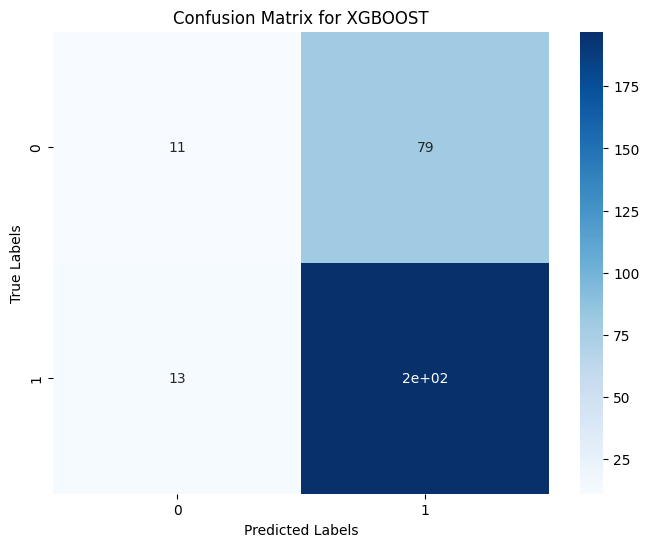

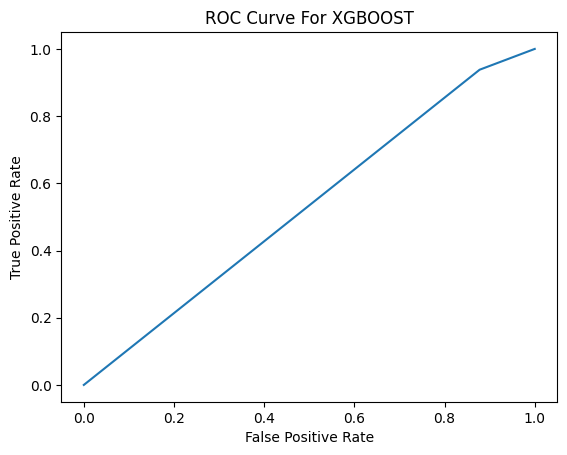



1 ['checking_status_no_checking']


C:\Users\KondapalliVasudevaRa\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:29:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "rate_drop" } are not used.

  warnings.warn(smsg, UserWarning)


========================= XGBOOST =========================
++++++++++ 700 700
Accuracy is:
 		 trained data:  0.7 
 		 test data:  0.7
--------------------------------------------------
Precision is:
 		 trained data:  0.7 
 		 test data:  0.7
--------------------------------------------------
Recall is:
 		 trained data:  1.0 
 		 test data:  1.0
--------------------------------------------------
F1 score is:
 		 trained data:  0.8235294117647058 
 		 test data:  0.8235294117647058


c:\Users\KondapalliVasudevaRa\.conda\envs\bajaj_cred_exp_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KondapalliVasudevaRa\.conda\envs\bajaj_cred_exp_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KondapalliVasudevaRa\.conda\envs\bajaj_cred_exp_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

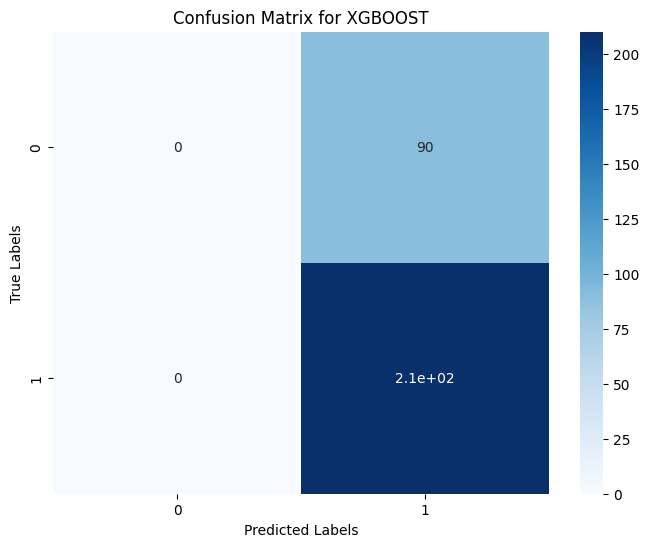

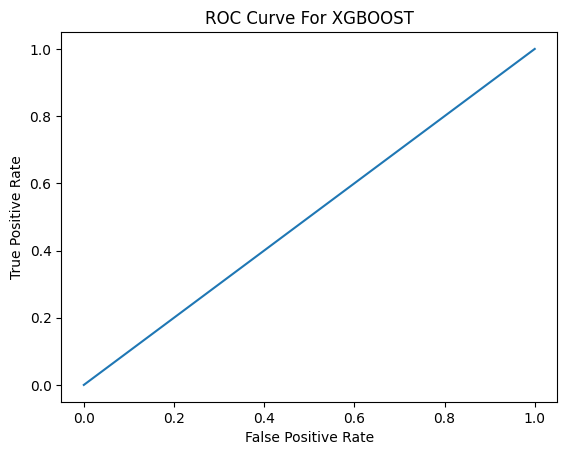

In [51]:
for i in range (1, len(non_zero_imp_features.Feature)):
    features = non_zero_imp_features.Feature
    print(len(features.to_list()[:-i]), features.to_list()[:-i])
    split_and_train(X[features.to_list()[:-i]], y, best_params)
